## Exploratory data analysis and profiling

Use of Kaggle Give Me Some Credit dataset
https://www.kaggle.com/c/GiveMeSomeCredit

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Load in the data with `read_csv()`
train_df = pd.read_csv('/Users/al861/Desktop/rds_final/cs-training.csv',
                     header=0)


In [6]:
train_df.head(20)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [87]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [88]:
train_df = train_df.rename(columns={'SeriousDlqin2yrs':'dlq_2yrs',
       'RevolvingUtilizationOfUnsecuredLines':'revolving_unsecured_lines', 'age':'age',
       'NumberOfTime30-59DaysPastDueNotWorse':'num_30days_late', 'DebtRatio':'debt_ratio', 'MonthlyIncome':'monthly_inc',
       'NumberOfOpenCreditLinesAndLoans':'num_open_credit_loans', 'NumberOfTimes90DaysLate':'num_90days_late',
       'NumberRealEstateLoansOrLines':'num_real_estate_loans', 'NumberOfTime60-89DaysPastDueNotWorse':'num_60days_late',
       'NumberOfDependents':'num_dependents'})

In [89]:
#dropping the row num column
train_df=train_df.drop(columns=['Unnamed: 0'])

In [90]:
train_df.columns

Index(['dlq_2yrs', 'revolving_unsecured_lines', 'age', 'num_30days_late',
       'debt_ratio', 'monthly_inc', 'num_open_credit_loans', 'num_90days_late',
       'num_real_estate_loans', 'num_60days_late', 'num_dependents'],
      dtype='object')

In [91]:
train_df.shape

(150000, 11)

In [106]:
def add_freq():
    ncount = len(train_df)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)

In [102]:
train_df['dlq_2yrs'].value_counts()

0    139974
1     10026
Name: dlq_2yrs, dtype: int64

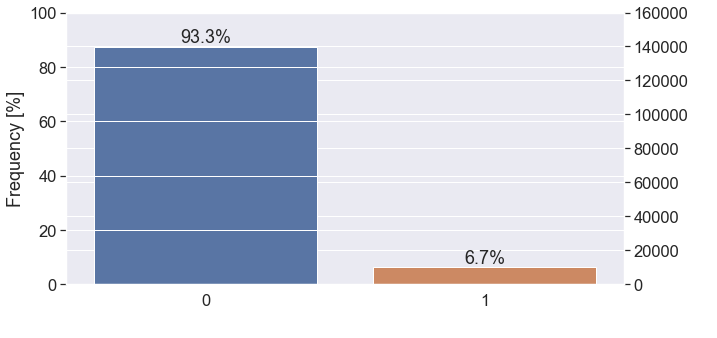

In [107]:
ax = sns.countplot(x = train_df.dlq_2yrs)
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

add_freq()

plt.show()

In [17]:
train_df['revolving_unsecured_lines'].value_counts()

0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
0.007984        6
0.954092        6
0.796407        5
0.850299        5
0.538922        5
1.003322        5
0.717131        5
0.994012        5
0.046048        5
0.582834        5
0.988024        5
0.004999        5
0.962076        4
0.003650        4
0.076923        4
0.932136        4
0.846307        4
0.930233        4
0.037498        4
0.120879        4
0.996400        4
0.001000        4
0.992016        4
0.948207        4
0.035964        4
            ...  
0.185457        1
0.240394        1
0.103126        1
0.009586        1
0.007483        1
0.243720        1
0.625282        1
0.264277        1
0.107940        1
0.478457        1
0.047742        1
0.133503        1
0.972451        1
0.110805        1
0.013018        1
0.022324        1
0.217510        1
0.020559        1
0.159196        1
0.371764        1
0.237108        1
0.924179        1
0.364635        1
0.009577        1
0.007792  

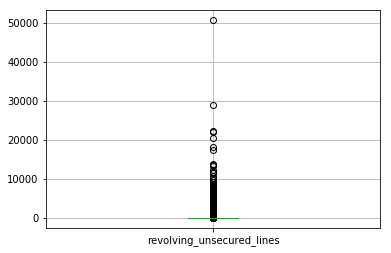

In [51]:
train_df.boxplot(column="revolving_unsecured_lines")

In [28]:
train_df['age'].value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
46     3714
53     3648
51     3627
52     3609
56     3589
62     3568
54     3561
61     3522
45     3502
58     3443
55     3416
57     3375
44     3294
59     3280
60     3258
43     3208
41     3122
40     3093
42     3082
64     3058
39     2987
38     2631
65     2594
37     2521
67     2503
       ... 
24      816
81      774
82      647
23      641
83      512
85      483
84      480
22      434
86      407
87      357
88      313
89      276
90      198
21      183
91      154
92       93
93       87
94       47
95       45
96       18
97       17
99        9
98        6
103       3
102       3
101       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

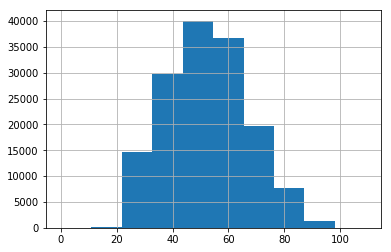

In [76]:
train_df['age'].hist()

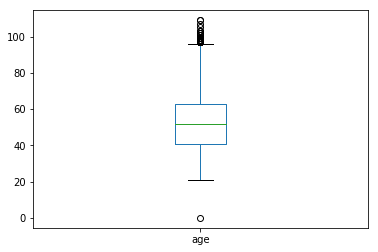

In [55]:
train_df['age'].plot.box()

In [30]:
train_df['num_30days_late'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: num_30days_late, dtype: int64

In [ ]:
train_df['num_30days_late'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [32]:
train_df['debt_ratio'].value_counts()

0.000000     4113
1.000000      229
4.000000      174
2.000000      170
3.000000      162
5.000000      143
9.000000      125
10.000000     117
7.000000      115
13.000000     114
6.000000      112
11.000000     108
8.000000      106
12.000000     102
14.000000     101
21.000000      99
15.000000      98
19.000000      91
16.000000      86
18.000000      83
20.000000      83
28.000000      80
24.000000      79
30.000000      78
25.000000      78
22.000000      78
29.000000      77
27.000000      76
23.000000      70
26.000000      69
             ... 
0.474797        1
0.508349        1
0.210872        1
0.074325        1
0.294245        1
0.230446        1
0.435326        1
0.607805        1
0.339040        1
0.558307        1
0.384478        1
1.366861        1
0.275018        1
0.909718        1
0.278574        1
0.610896        1
0.271490        1
0.336025        1
0.378557        1
0.123922        1
0.275182        1
0.174031        1
0.359255        1
0.640236        1
0.566348  

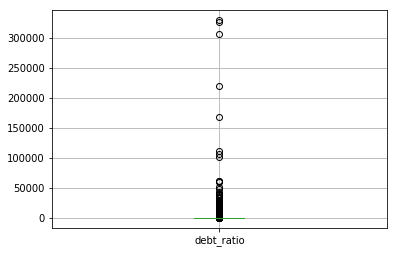

In [79]:
train_df.boxplot(column="debt_ratio")


In [34]:
train_df['monthly_inc'].value_counts()

5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
2500.0     1551
10000.0    1466
3500.0     1360
4500.0     1226
7000.0     1223
8000.0     1127
2000.0     1116
7500.0     1051
10500.0    1013
5500.0      897
6500.0      841
9000.0      763
1.0         605
3200.0      584
6250.0      570
4200.0      569
4166.0      554
1500.0      553
12000.0     547
8333.0      543
8500.0      505
3750.0      504
3600.0      503
2400.0      501
12500.0     499
           ... 
6896.0        1
3057.0        1
20283.0       1
16254.0       1
727.0         1
8405.0        1
28430.0       1
8852.0        1
7462.0        1
10224.0       1
40388.0       1
15667.0       1
6899.0        1
10099.0       1
30500.0       1
10101.0       1
25808.0       1
14803.0       1
9329.0        1
14214.0       1
16582.0       1
10105.0       1
11637.0       1
595.0         1
16580.0       1
3847.0        1
10113.0       1
14210.0       1
13023.0       1
1037.0        1
Name: monthly_inc, Lengt

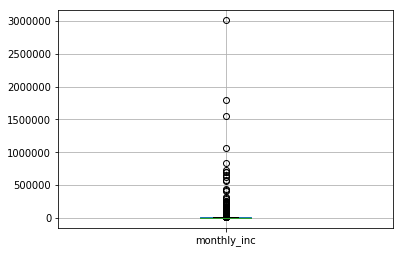

In [52]:
train_df.boxplot(column="monthly_inc")

In [36]:
train_df['num_open_credit_loans'].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
45        8
43        8
42        8
37        7
48        6
41        4
54        4
49        4
46        3
52        3
51        2
56        2
57        2
50        2
47        2
44        2
53        1
58        1
Name: num_open_credit_loans, dtype: int64

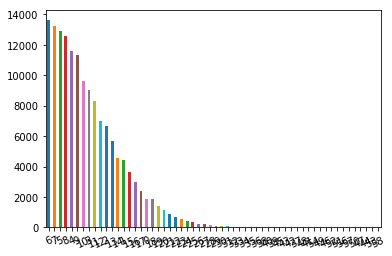

In [37]:
train_df['num_open_credit_loans'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [38]:
train_df['num_90days_late'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: num_90days_late, dtype: int64

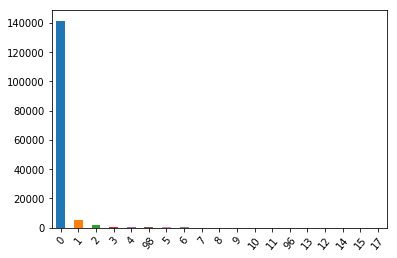

In [54]:
train_df['num_90days_late'].value_counts().plot(kind='bar')
plt.xticks(rotation=50)
plt.show()

In [40]:
train_df['num_real_estate_loans'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: num_real_estate_loans, dtype: int64

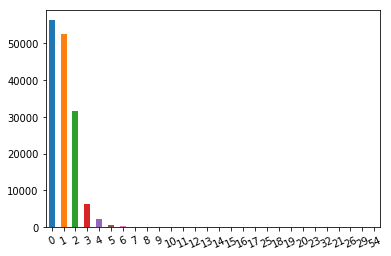

In [42]:
train_df['num_real_estate_loans'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [43]:
train_df['num_60days_late'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: num_60days_late, dtype: int64

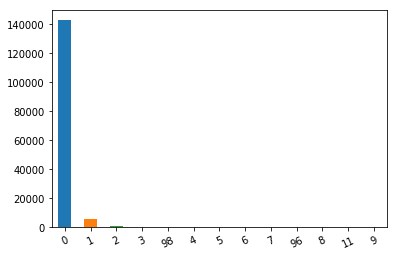

In [44]:
train_df['num_60days_late'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [45]:
train_df['num_dependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: num_dependents, dtype: int64

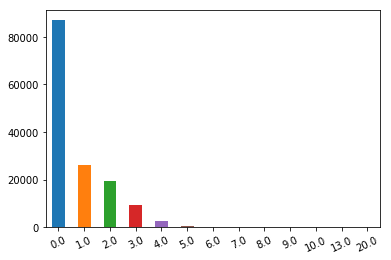

In [46]:
train_df['num_dependents'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [47]:
for col in train_df.columns:
    print(col, " : ", sum(train_df[col].isnull()))

id  :  0
dlq_2yrs  :  0
revolving_unsecured_lines  :  0
age  :  0
num_30days_late  :  0
debt_ratio  :  0
monthly_inc  :  29731
num_open_credit_loans  :  0
num_90days_late  :  0
num_real_estate_loans  :  0
num_60days_late  :  0
num_dependents  :  3924


In [ ]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.plot(monthly_inc, num_dependents)

In [48]:
train_df.describe()

,id,dlq_2yrs,revolving_unsecured_lines,age,num_30days_late,debt_ratio,monthly_inc,num_open_credit_loans,num_90days_late,num_real_estate_loans,num_60days_late,num_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


You see that this function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data. Note that, of course, there are many packages available in Python that can give you those statistics, including Pandas itself. Using this function is just one of the ways to get this information.

Also note that you certainly need to take the time to dive deeper into the descriptive statistics if you haven’t done this yet. You can use these descriptive statistics to begin to assess the quality of your data. Then you’ll be able to decide whether you need to correct, discard or deal with the data in anohter way. This is usually the data profiling step. This step in the EDA is meant to understand the data elements and its anomalies a bit better.

## First and Last DataFrame Rows


Now that you have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, you can easily check out the first and last lines of your DataFrame, respectively.

In [7]:
train_df.tail(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


## Sampling The Data


If you have a large dataset, you might consider taking a sample of your data as an easy way to get a feel for your data quickly. As a first and easy way to do this, you can make use of the sample() function that is included in Pandas, just like this:

In [8]:
train_df.sample(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
10233,10234,0,0.719581,62,0,0.440240,6500.0,11,0,2,0,1.0
80050,80051,0,0.042710,68,0,0.652669,5000.0,28,0,2,0,1.0
30476,30477,0,0.000000,54,1,0.141968,4500.0,6,0,0,0,0.0
19829,19830,0,0.939864,37,0,0.366058,7058.0,8,0,1,0,2.0
131860,131861,0,0.222108,59,0,0.180623,25400.0,10,0,1,0,1.0


## Correlation